# Example
To illustrate the process by which the Gurobi optimizer interfaces with the Python code of this project we use this example. The example is taken from the Gurobi documentation *kilde*.

In this example we want to produce the maximal amount value of coins, using a certain amount of raw materials. How much material is used by different types of coins is given by the following table.
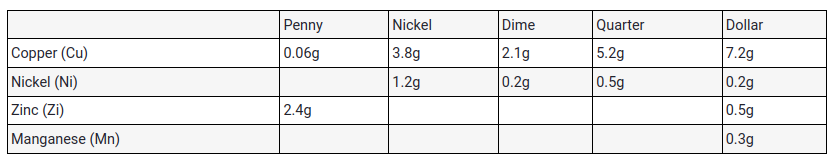
We assume that we have 1000 grams of copper, and 50 grams of every other material. We then want to create the maximal dollar value possible using the materials we have, along with the knowledge of how much raw material is used by the different processes.

## Create a model
First we import the necessary tools and create the model object

In [33]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model()

## Variables and constraints
We then add our variables to the model, such that the optimization can happen. The constraints are set by the table shown earlier.

In [35]:
pennies = model.addVar(vtype=GRB.INTEGER, name="Pennies")
nickels = model.addVar(vtype=GRB.INTEGER, name="Nickels")
dimes = model.addVar(vtype=GRB.INTEGER, name="Dimes")
quarters = model.addVar(vtype=GRB.INTEGER, name="Quarters")
dollars = model.addVar(vtype=GRB.INTEGER, name="Dollars")

copper = model.addVar(vtype=GRB.CONTINUOUS, name="Copper")
nickel = model.addVar(vtype=GRB.CONTINUOUS, name="Nickel")
zinc = model.addVar(vtype=GRB.CONTINUOUS, name="Zinc")
manganese = model.addVar(vtype=GRB.CONTINUOUS, name="Manganese")

model.addConstr(0.06*pennies + 3.8*nickels + 2.1*dimes + 5.2 * quarters + 7.2 * dollars == copper)
model.addConstr(1.2*nickels + 0.2*dimes + 0.5*quarters + 0.2*dollars == nickel)
model.addConstr(2.4*pennies + 0.5*dollars == zinc)
model.addConstr(0.3*dollars == manganese)

model.addConstr(copper <= 1000)
model.addConstr(nickel <= 50)
model.addConstr(zinc <= 50)
model.addConstr(manganese <= 50)

<gurobi.Constr *Awaiting Model Update*>

## Setting the objective function and optimizing
We then set the objective function based on the value of the individual coins against the US dollar

In [36]:
model.setObjective(0.01*pennies + 0.05*nickels + 0.1*dimes + 0.25*quarters + 1*dollars, GRB.MAXIMIZE)
model.optimize()

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: 12th Gen Intel(R) Core(TM) i5-12500H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 16 rows, 18 columns and 40 nonzeros
Model fingerprint: 0x1344c349
Variable types: 8 continuous, 10 integer (0 binary)
Coefficient statistics:
  Matrix range     [6e-02, 7e+00]
  Objective range  [1e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+01, 1e+03]
Found heuristic solution: objective -0.0000000
Presolve removed 13 rows and 14 columns
Presolve time: 0.00s
Presolved: 3 rows, 4 columns, 9 nonzeros
Variable types: 0 continuous, 4 integer (0 binary)
Found heuristic solution: objective 26.1000000

Root relaxation: objective 1.134615e+02, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node

In [38]:
print(f"Optimal solution achieved with objective value {model.objVal}")
print(f"This is achieved by using {pennies.x} pennies, {nickels.x} nickels, {dimes.x} dimes, {quarters.x} quarters, and {dollars.x} dollars")
print(f"This results in {copper.x} grams of copper, {nickel.x} grams of nickel, {zinc.x} grams of zinc, and {manganese.x} grams of manganese")

Optimal solution achieved with objective value 113.45
This is achieved by using 0.0 pennies, -0.0 nickels, 2.0 dimes, 53.0 quarters, and 100.0 dollars
This results in 999.8 grams of copper, 46.9 grams of nickel, 50.0 grams of zinc, and 30.0 grams of manganese
